# HDBSCAN

In [41]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

from acse_9_irp_wafflescore import MiscHelpers as mh
from acse_9_irp_wafflescore import FCMHelpers as fh
from acse_9_irp_wafflescore import dataPreprocessing as dp
from acse_9_irp_wafflescore import HDBScanHelpers as hp

import numpy as np

import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

# Tested with model with smaller anomaly (M5b)

In [ ]:
model = 'M5b'

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(cdir)

means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)

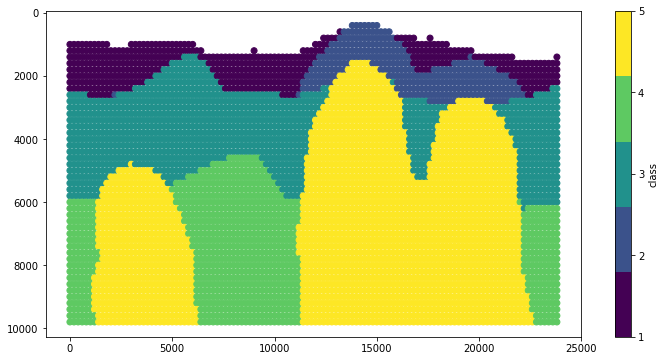

In [4]:
# Plotting the True label of the input
mh.plot_e_model(label, x, z, sep_label=True)

## Test including x and z position

In [33]:
cluster_labels, avg_sils, avg_ch, min_size, min_sam = hp.random_search_hdb(norm_data, (5,5), max_eval=40, rand_range=(50,50))

2019-08-28 22:08:41,844 | INFO : min_size=41, min_sam=7, sil=0.033892, ch=312.607535
2019-08-28 22:08:42,546 | INFO : min_size=32, min_sam=35, sil=-0.006569, ch=382.410634
2019-08-28 22:08:43,215 | INFO : min_size=41, min_sam=5, sil=-0.019930, ch=359.487505
2019-08-28 22:08:43,894 | INFO : min_size=18, min_sam=34, sil=-0.047009, ch=288.619069
2019-08-28 22:08:44,561 | INFO : min_size=36, min_sam=22, sil=-0.015698, ch=329.262821
2019-08-28 22:08:45,245 | INFO : min_size=46, min_sam=15, sil=0.026512, ch=359.889008
2019-08-28 22:08:45,940 | INFO : min_size=7, min_sam=38, sil=-0.047437, ch=338.765812
2019-08-28 22:08:46,615 | INFO : min_size=36, min_sam=25, sil=-0.031109, ch=344.944592
2019-08-28 22:08:47,281 | INFO : min_size=9, min_sam=20, sil=-0.053446, ch=263.857983
2019-08-28 22:08:47,997 | INFO : min_size=52, min_sam=28, sil=0.010888, ch=431.330757
2019-08-28 22:08:48,753 | INFO : min_size=7, min_sam=31, sil=-0.016589, ch=346.222935
2019-08-28 22:08:49,575 | INFO : min_size=13, min_s

min_size, min_sample: 26.0 12.0
silhouette score: 0.04214140817489476
calinski harabaz score: 358.79919423632015


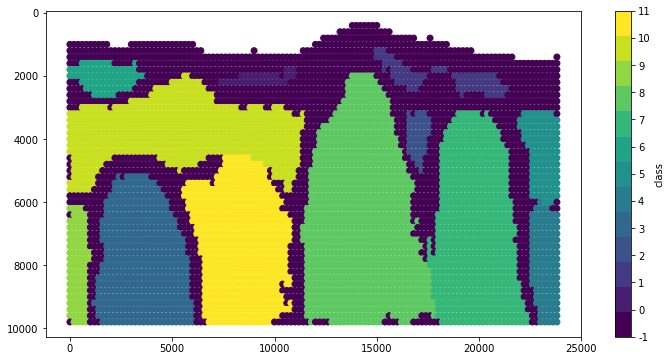

In [32]:
for i in range(cluster_labels.shape[0]):
    print("min_size, min_sample:", min_size[i], min_sam[i])
    print("silhouette score:", avg_sils[i])
    print("calinski harabaz score:", avg_ch[i])
    mh.plot_e_model(cluster_labels[i], x, z, sep_label=True)

min_size, min_sample: 41.0 7.0
silhouette score: 0.033891681261130305
calinski harabaz score: 312.60753498930006


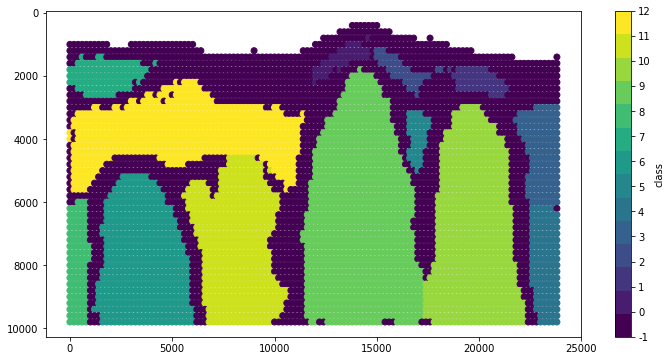

min_size, min_sample: 52.0 28.0
silhouette score: 0.010887587568023788
calinski harabaz score: 431.33075691461823


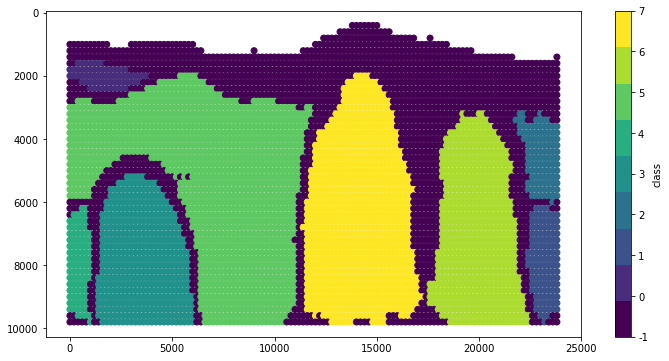

In [34]:
for i in range(cluster_labels.shape[0]):
    print("min_size, min_sample:", min_size[i], min_sam[i])
    print("silhouette score:", avg_sils[i])
    print("calinski harabaz score:", avg_ch[i])
    mh.plot_e_model(cluster_labels[i], x, z, sep_label=True)

## Test excluding x and z position

In [35]:
# without X, Z position
cluster_labels_2, avg_sils_2, avg_ch_2, min_size_2, min_sam_2 = hp.random_search_hdb(norm_data[:,:-2], (5,5), max_eval=40, rand_range=(50,50))

2019-08-28 22:10:11,519 | INFO : min_size=41, min_sam=7, sil=0.014174, ch=307.283049
2019-08-28 22:10:12,223 | INFO : min_size=32, min_sam=35, sil=0.087001, ch=822.174716
2019-08-28 22:10:12,923 | INFO : min_size=41, min_sam=5, sil=-0.039531, ch=291.822365
2019-08-28 22:10:13,705 | INFO : min_size=18, min_sam=34, sil=-0.051909, ch=219.336521
2019-08-28 22:10:14,438 | INFO : min_size=36, min_sam=22, sil=0.080047, ch=397.989598
2019-08-28 22:10:15,105 | INFO : min_size=46, min_sam=15, sil=0.018021, ch=311.204850
2019-08-28 22:10:15,818 | INFO : min_size=7, min_sam=38, sil=0.052823, ch=649.295445
2019-08-28 22:10:16,515 | INFO : min_size=36, min_sam=25, sil=0.091734, ch=418.400412
2019-08-28 22:10:17,178 | INFO : min_size=9, min_sam=20, sil=0.001870, ch=447.763092
2019-08-28 22:10:17,791 | INFO : min_size=52, min_sam=28, sil=0.082882, ch=378.318308
2019-08-28 22:10:18,484 | INFO : min_size=7, min_sam=31, sil=-0.047938, ch=200.560085
2019-08-28 22:10:19,202 | INFO : min_size=13, min_sam=43

min_size, min_sample: 32.0 35.0
silhouette score: 0.08700110793155331
calinski harabaz score: 822.1747163801657


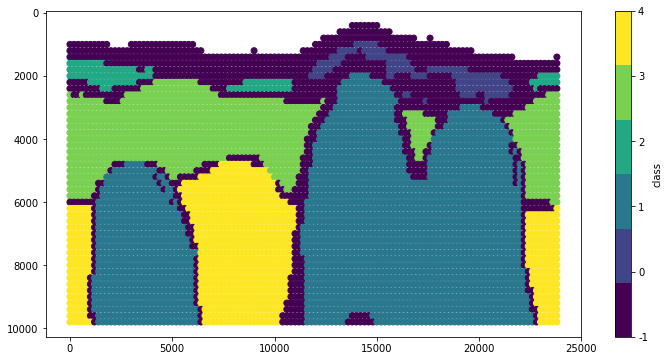

min_size, min_sample: 48.0 21.0
silhouette score: 0.11771919249490731
calinski harabaz score: 479.08900459726874


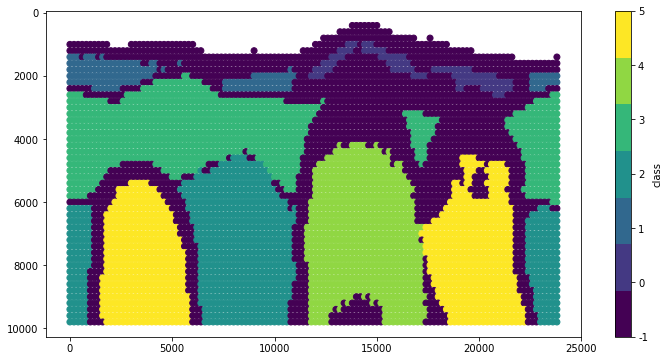

In [26]:
for i in range(cluster_labels_2.shape[0]):
    print("min_size, min_sample:", min_size_2[i], min_sam_2[i])
    print("silhouette score:", avg_sils_2[i])
    print("calinski harabaz score:", avg_ch_2[i])
    mh.plot_e_model(cluster_labels_2[i], x, z, sep_label=True)

min_size, min_sample: 33.0 44.0
silhouette score: 0.21447144495040937
calinski harabaz score: 857.4271250313056


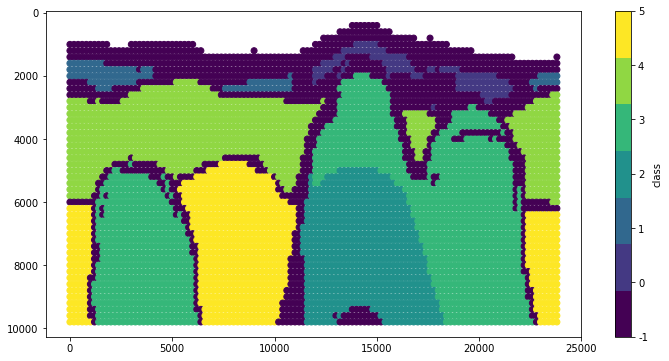

In [36]:
for i in range(cluster_labels_2.shape[0]):
    print("min_size, min_sample:", min_size_2[i], min_sam_2[i])
    print("silhouette score:", avg_sils_2[i])
    print("calinski harabaz score:", avg_ch_2[i])
    mh.plot_e_model(cluster_labels_2[i], x, z, sep_label=True)

# Tested with model with higher anomaly (M5a)


In [ ]:
model = 'M5a'

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(cdir)

means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)

## Test including x and z position

In [48]:
cluster_labels_3, avg_sils_3, avg_ch_3, min_size_3, min_sam_3 = hp.random_search_hdb(norm_data, (5,5), max_eval=40, rand_range=(50,50))

2019-08-28 22:19:49,185 | INFO : min_size=41, min_sam=7, sil=0.014566, ch=314.048557
2019-08-28 22:19:49,890 | INFO : min_size=32, min_sam=35, sil=-0.029037, ch=314.452975
2019-08-28 22:19:50,558 | INFO : min_size=41, min_sam=5, sil=0.016894, ch=313.902306
2019-08-28 22:19:51,260 | INFO : min_size=18, min_sam=34, sil=0.023877, ch=277.971848
2019-08-28 22:19:51,962 | INFO : min_size=36, min_sam=22, sil=-0.014896, ch=308.800929
2019-08-28 22:19:52,789 | INFO : min_size=46, min_sam=15, sil=-0.086330, ch=275.070695
2019-08-28 22:19:53,645 | INFO : min_size=7, min_sam=38, sil=-0.082351, ch=223.670489
2019-08-28 22:19:54,407 | INFO : min_size=36, min_sam=25, sil=-0.035723, ch=347.710432
2019-08-28 22:19:54,475 | INFO : Random search using min_size = 9, min_sam = 20 result to very small / large number of clusters (n_clusters = 3)
2019-08-28 22:19:55,258 | INFO : min_size=52, min_sam=28, sil=0.002850, ch=316.739731
2019-08-28 22:19:56,134 | INFO : min_size=7, min_sam=31, sil=-0.053112, ch=219.

min_size, min_sample: 48.0 24.0
silhouette score: 0.06584213067550503
calinski harabaz score: 396.9817597073947


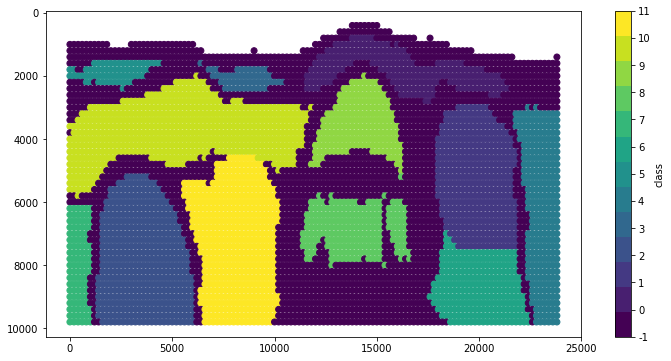

In [39]:
for i in range(cluster_labels_3.shape[0]):
    print("min_size, min_sample:", min_size_3[i], min_sam_3[i])
    print("silhouette score:", avg_sils_3[i])
    print("calinski harabaz score:", avg_ch_3[i])
    mh.plot_e_model(cluster_labels_3[i], x, z, sep_label=True)

min_size, min_sample: 48.0 24.0
silhouette score: 0.06584213067550503
calinski harabaz score: 396.9817597073947


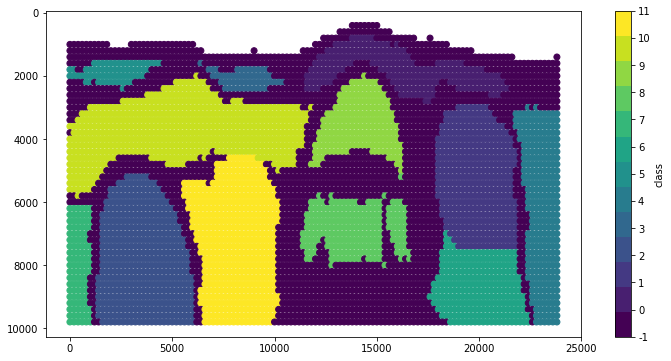

In [49]:
for i in range(cluster_labels_3.shape[0]):
    print("min_size, min_sample:", min_size_3[i], min_sam_3[i])
    print("silhouette score:", avg_sils_3[i])
    print("calinski harabaz score:", avg_ch_3[i])
    mh.plot_e_model(cluster_labels_3[i], x, z, sep_label=True)

## Test excluding x and z position

In [52]:
cluster_labels_4, avg_sils_4, avg_ch_4, min_size_4, min_sam_4 = hp.random_search_hdb(norm_data[:,:-2], (5,5), max_eval=20, rand_range=(10,50))

2019-08-28 22:21:25,724 | INFO : Random search using min_size = 14, min_sam = 7 result to very small / large number of clusters (n_clusters = 51)
2019-08-28 22:21:26,318 | INFO : min_size=11, min_sam=35, sil=0.157843, ch=621.297573
2019-08-28 22:21:26,369 | INFO : Random search using min_size = 14, min_sam = 5 result to very small / large number of clusters (n_clusters = 55)
2019-08-28 22:21:27,102 | INFO : min_size=8, min_sam=34, sil=0.176296, ch=735.826972
2019-08-28 22:21:27,732 | INFO : min_size=12, min_sam=22, sil=0.139484, ch=526.655751
2019-08-28 22:21:27,784 | INFO : Random search using min_size = 7, min_sam = 7 result to very small / large number of clusters (n_clusters = 107)
2019-08-28 22:21:28,643 | INFO : min_size=13, min_sam=36, sil=0.161099, ch=616.380631
2019-08-28 22:21:28,698 | INFO : Random search using min_size = 10, min_sam = 9 result to very small / large number of clusters (n_clusters = 37)
2019-08-28 22:21:29,542 | INFO : min_size=8, min_sam=52, sil=0.148017, ch

min_size, min_sample: 9.0 47.0
silhouette score: 0.18767730128029694
calinski harabaz score: 725.5765667667196


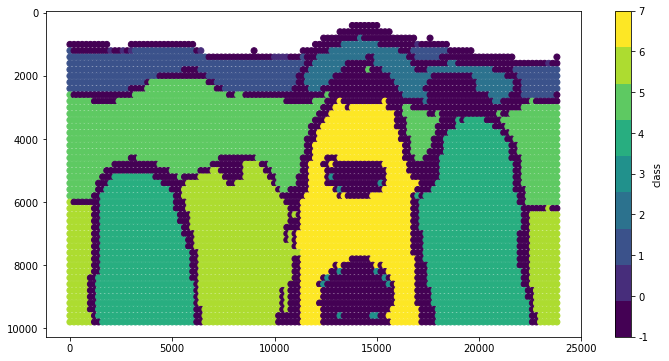

min_size, min_sample: 12.0 54.0
silhouette score: 0.18492479969911194
calinski harabaz score: 861.7878734336147


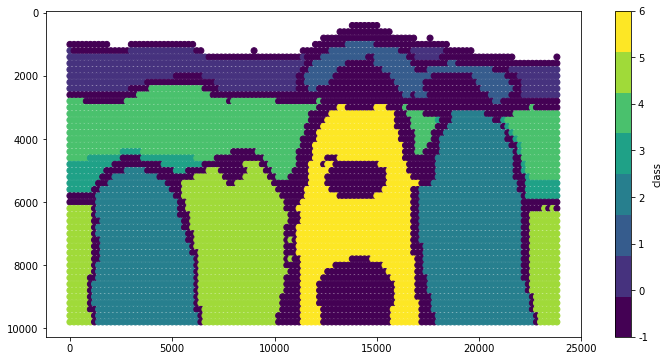

In [53]:
for i in range(cluster_labels_4.shape[0]):
    print("min_size, min_sample:", min_size_4[i], min_sam_4[i])
    print("silhouette score:", avg_sils_4[i])
    print("calinski harabaz score:", avg_ch_4[i])
    mh.plot_e_model(cluster_labels_4[i], x, z, sep_label=True)

min_size, min_sample: 27.0 29.0
silhouette score: 0.2201308274949193
calinski harabaz score: 908.3084309224492


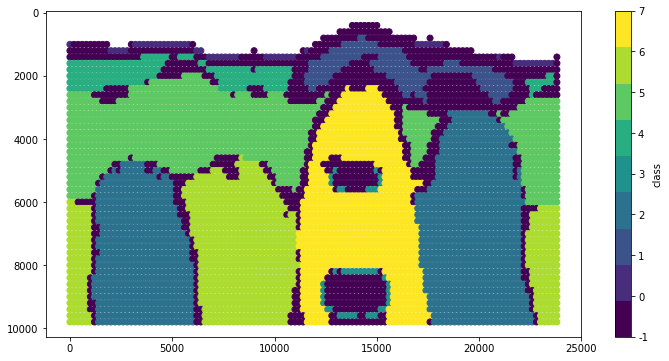

In [51]:
for i in range(cluster_labels_4.shape[0]):
    print("min_size, min_sample:", min_size_4[i], min_sam_4[i])
    print("silhouette score:", avg_sils_4[i])
    print("calinski harabaz score:", avg_ch_4[i])
    mh.plot_e_model(cluster_labels_4[i], x, z, sep_label=True)

### Test using K-NN to populate the noisy part of the result

Initial cluster.


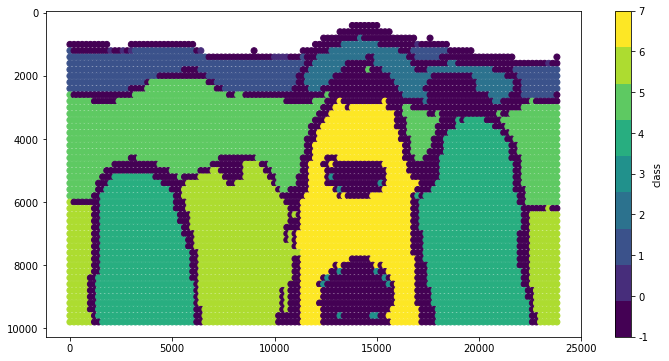

Cluster after applying KNN on noisy part.


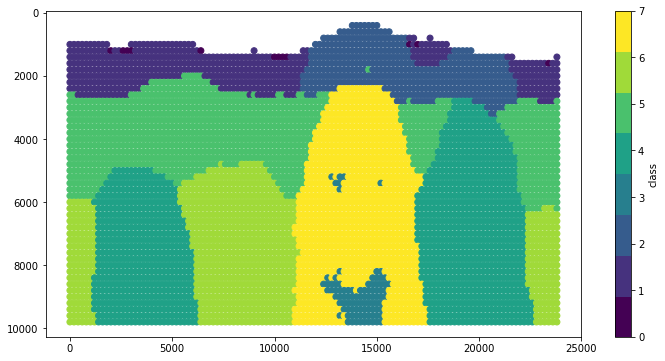

In [54]:
xz = np.vstack([x, z]).T

noise_idx = np.where(cluster_labels_4[0]==-1)
label_idx = np.where(cluster_labels_4[0]!=-1)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(xz[label_idx], cluster_labels_4[0][label_idx]) 

new_c = np.array(cluster_labels_4[0])

new_c[noise_idx] = neigh.predict(xz[noise_idx])

print("Initial cluster.")
mh.plot_e_model(cluster_labels_4[0], x, z, sep_label=True)
print("Cluster after applying KNN on noisy part.")
mh.plot_e_model(new_c, x, z, sep_label=True)

The result does not seem to be worth exploring. Letting the noisy part remains could help identify anomaly better. The user can then look at the noises and determine the lithology better.

In this case, the noisy part identifies temperature anomaly.